<a href="https://colab.research.google.com/github/AyushmanBhatt/AyushmanBhatt/blob/main/MiniProjectCreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("whitegrid")

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv("/content/credit_dataset.csv",index_col=0)

In [ ]:
dataset=data.copy()

In [ ]:
dataset.head()

,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


In [ ]:
#shape of dataset
print("Rows    :",dataset.shape[0])
print("Columns :",dataset.shape[1])

Rows    : 25134
Columns : 19


In [ ]:
#checking for NULL VALUES in dataset
dataset.isna().sum()

ID                0
GENDER            0
CAR               0
REALITY           0
NO_OF_CHILD       0
INCOME            0
INCOME_TYPE       0
EDUCATION_TYPE    0
FAMILY_TYPE       0
HOUSE_TYPE        0
FLAG_MOBIL        0
WORK_PHONE        0
PHONE             0
E_MAIL            0
FAMILY SIZE       0
BEGIN_MONTH       0
AGE               0
YEARS_EMPLOYED    0
TARGET            0
dtype: int64

In [ ]:
#datatypes of attributes present in dataset
dataset.dtypes

ID                  int64
GENDER             object
CAR                object
REALITY            object
NO_OF_CHILD         int64
INCOME            float64
INCOME_TYPE        object
EDUCATION_TYPE     object
FAMILY_TYPE        object
HOUSE_TYPE         object
FLAG_MOBIL          int64
WORK_PHONE          int64
PHONE               int64
E_MAIL              int64
FAMILY SIZE       float64
BEGIN_MONTH         int64
AGE                 int64
YEARS_EMPLOYED      int64
TARGET              int64
dtype: object

In [10]:
#checking for unique values in dataset
dataset.nunique()

ID                25134
GENDER                2
CAR                   2
REALITY               2
NO_OF_CHILD           9
INCOME              195
INCOME_TYPE           5
EDUCATION_TYPE        5
FAMILY_TYPE           5
HOUSE_TYPE            6
FLAG_MOBIL            1
WORK_PHONE            2
PHONE                 2
E_MAIL                2
FAMILY SIZE          10
BEGIN_MONTH          61
AGE                  47
YEARS_EMPLOYED       43
TARGET                2
dtype: int64

0    0.98321
1    0.01679
Name: TARGET, dtype: float64


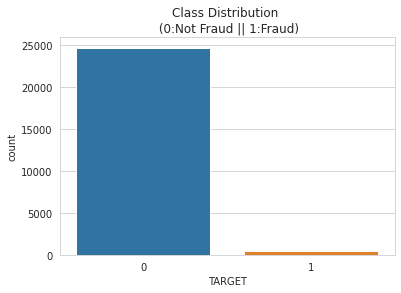

In [11]:
# TARGET column
sns.countplot(dataset.TARGET).set_title("Class Distribution \n (0:Not Fraud || 1:Fraud)")
print(dataset.TARGET.value_counts(normalize=True))
plt.show()

Not Frauds : 98.32 % of the dataset
Frauds : 1.68 % of the dataset


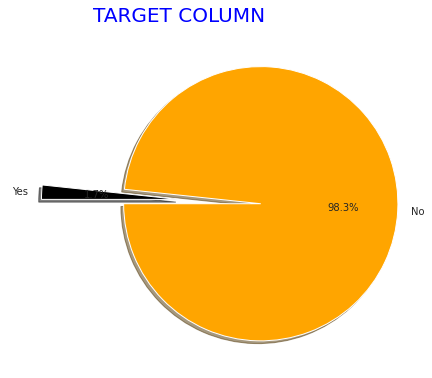

In [12]:
labels = ['No','Yes']
data = dataset['TARGET'].value_counts(sort=True)
colours = ['Orange','black']
explode = (0.6,0)
plt.figure(figsize=(6,6))

plt.pie(data,colors = colours,shadow =True,startangle=180
        ,autopct="%1.1f%%",explode=explode,labels=labels)
plt.title("TARGET COLUMN",fontsize=20,color="b")
plt.tight_layout()

print('Not Frauds :', round(dataset['TARGET'].value_counts()[0]/len(dataset) * 100,2), '% of the dataset')
print('Frauds :', round(dataset['TARGET'].value_counts()[1]/len(dataset) * 100,2), '% of the dataset')

In [13]:
dataset.describe()

,ID,NO_OF_CHILD,INCOME,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
count,2.513400e+04,25134.000000,2.513400e+04,25134.0,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000
mean,5.078838e+06,0.512334,1.948339e+05,1.0,0.273812,0.292791,0.100660,2.294064,26.120594,40.536166,7.204106,0.016790
std,4.194102e+04,0.787785,1.045110e+05,0.0,0.445923,0.455052,0.300885,0.947590,16.439658,9.559474,6.414231,0.128486
min,5.008806e+06,0.000000,2.700000e+04,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000
25%,5.042228e+06,0.000000,1.350000e+05,1.0,0.000000,0.000000,0.000000,2.000000,12.000000,33.000000,3.000000,0.000000
50%,5.079004e+06,0.000000,1.800000e+05,1.0,0.000000,0.000000,0.000000,2.000000,24.000000,40.000000,5.000000,0.000000
75%,5.115604e+06,1.000000,2.250000e+05,1.0,1.000000,1.000000,0.000000,3.000000,39.000000,48.000000,10.000000,0.000000
max,5.150487e+06,19.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,20.000000,60.000000,67.000000,43.000000,1.000000


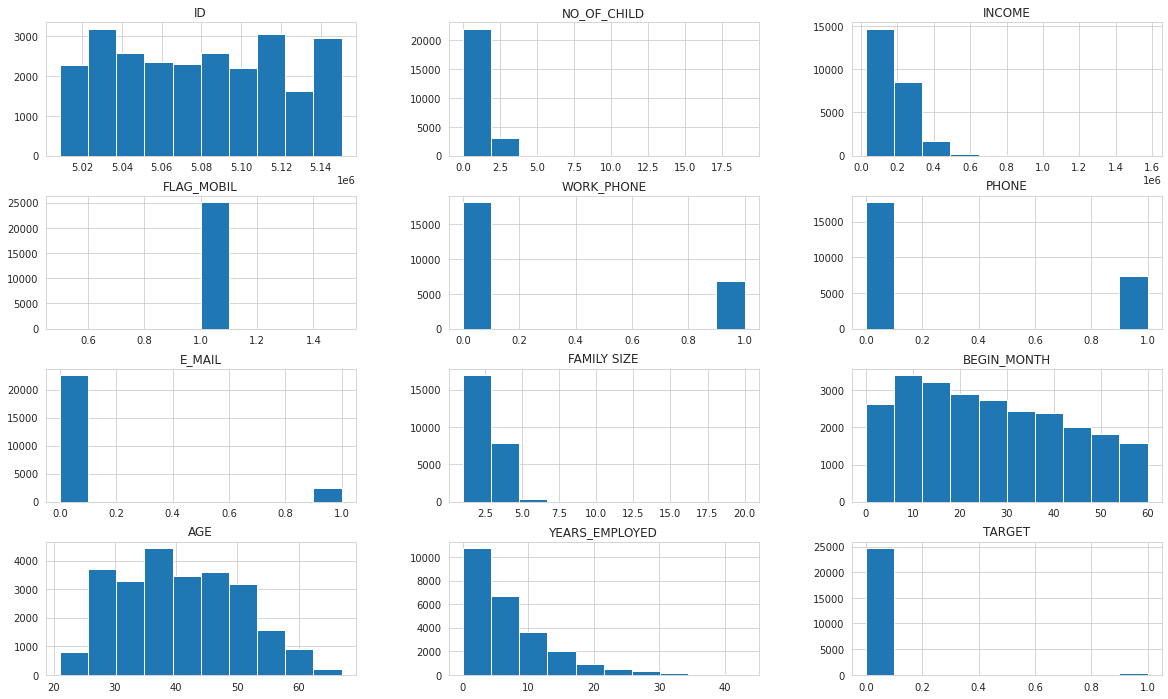

In [14]:
#Distribution of continuous 
dataset.hist(figsize=(20,12))
plt.show()

In [15]:
dataset.describe(include="O")

,GENDER,CAR,REALITY,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE
count,25134,25134,25134,25134,25134,25134,25134
unique,2,2,2,5,5,5,6
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment
freq,15630,14618,16461,15622,16808,17509,22102


In [16]:
#all the categorical columns with their values -
cols=dataset.describe(include="O").columns
for i in cols:
    print("Distinct_values :\n 'column_name' =",i)
    print(dataset[i].unique())
    print("")

Distinct_values :
 'column_name' = GENDER
['M' 'F']

Distinct_values :
 'column_name' = CAR
['Y' 'N']

Distinct_values :
 'column_name' = REALITY
['Y' 'N']

Distinct_values :
 'column_name' = INCOME_TYPE
['Working' 'Commercial associate' 'State servant' 'Student' 'Pensioner']

Distinct_values :
 'column_name' = EDUCATION_TYPE
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

Distinct_values :
 'column_name' = FAMILY_TYPE
['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']

Distinct_values :
 'column_name' = HOUSE_TYPE
['House / apartment' 'Rented apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']



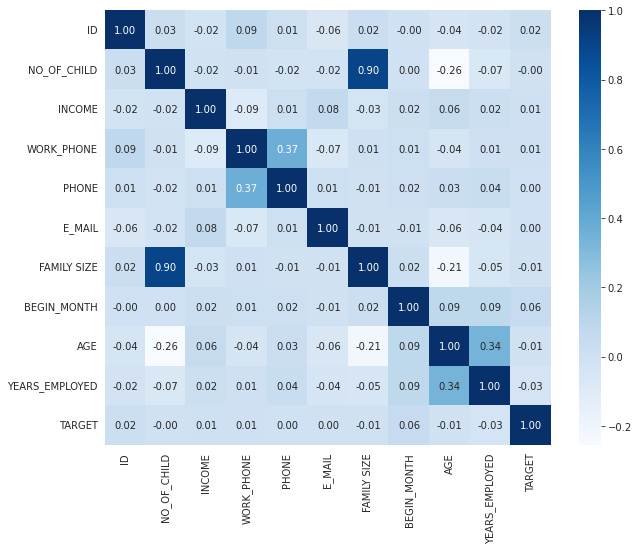

In [17]:
#dropping FLAG_MOBIL as all the values is this column is 1
plt.figure(figsize=(10,8))
sns.heatmap(dataset.drop("FLAG_MOBIL",axis=1).corr(),cmap="Blues",annot=True,fmt='.2f')
plt.show()

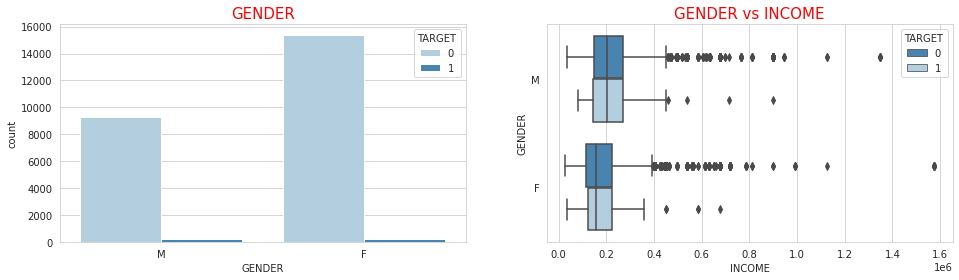

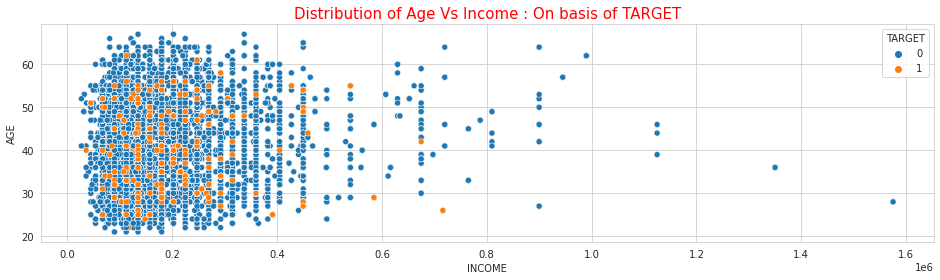

In [18]:
plt.figure(figsize=(16,4))
plt.subplot(121)
sns.countplot(dataset["GENDER"],hue="TARGET",data=dataset,palette="Blues")
plt.title("GENDER",fontsize=15,color="Red")
plt.subplot(122)
sns.boxplot(x="INCOME",y="GENDER",hue="TARGET",data=dataset,palette="Blues_r")
plt.title("GENDER vs INCOME",fontsize=15,color="Red")
plt.figure(figsize=(16,4))
sns.scatterplot(dataset["INCOME"],dataset["AGE"],hue=dataset["TARGET"])
plt.title("Distribution of Age Vs Income : On basis of TARGET",fontsize=15,color="Red")
plt.show()

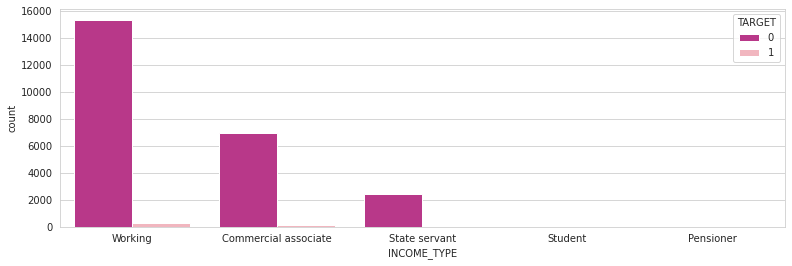

In [19]:
plt.figure(figsize=(13,4))
sns.countplot(dataset["INCOME_TYPE"],hue="TARGET",data=dataset,palette="RdPu_r")
plt.show()

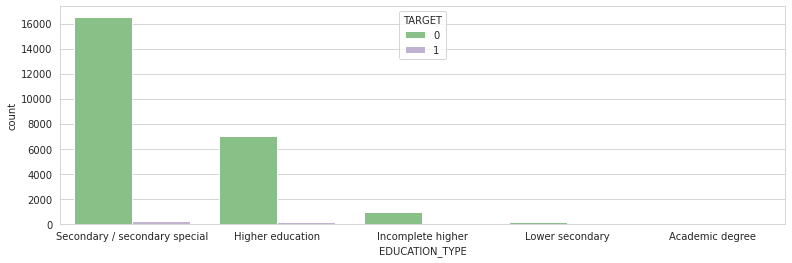

In [20]:
plt.figure(figsize=(13,4))
sns.countplot(dataset["EDUCATION_TYPE"],hue="TARGET",data=dataset,palette="Accent")
plt.show()

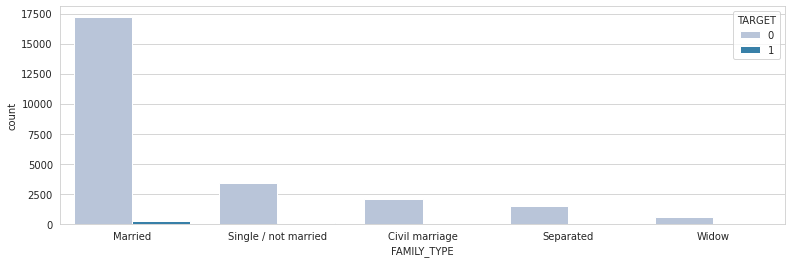

In [21]:
plt.figure(figsize=(13,4))
sns.countplot(dataset["FAMILY_TYPE"],hue="TARGET",data=dataset,palette="PuBu")
plt.show()

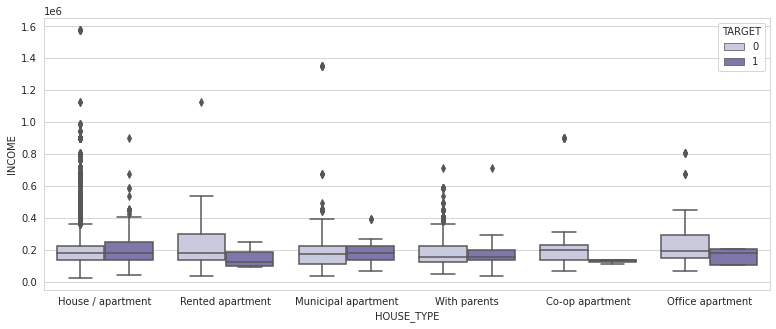

In [23]:
plt.figure(figsize=(13,5))
sns.boxplot(x="HOUSE_TYPE",y="INCOME",data=dataset,hue="TARGET",palette="Purples")
plt.show()

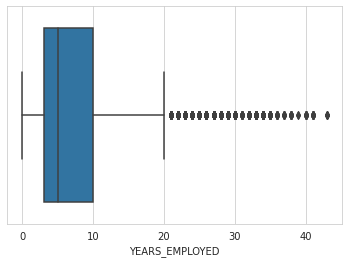

In [24]:
sns.boxplot(dataset["YEARS_EMPLOYED"])
plt.show()

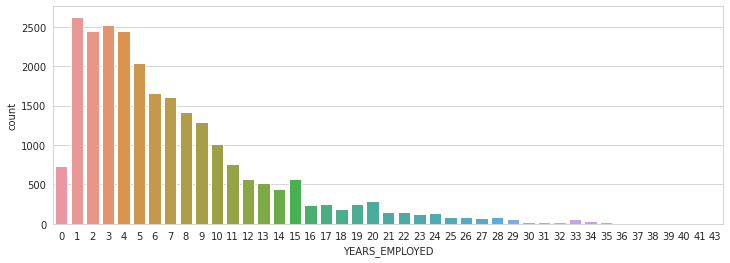

In [25]:
plt.figure(figsize=(12,4))
sns.countplot(dataset["YEARS_EMPLOYED"])
plt.show()

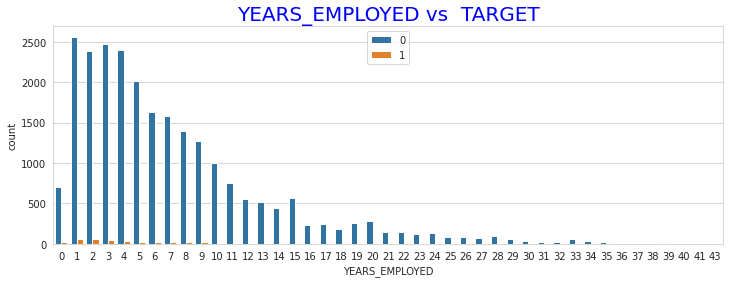

In [26]:
plt.figure(figsize=(12,4))
sns.countplot(dataset["YEARS_EMPLOYED"],hue="TARGET",data=dataset)
plt.title("YEARS_EMPLOYED vs  TARGET",fontsize=20,color="BLUE")
plt.legend()
plt.show()

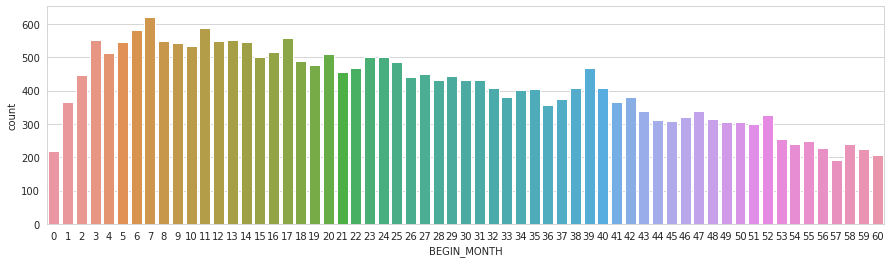

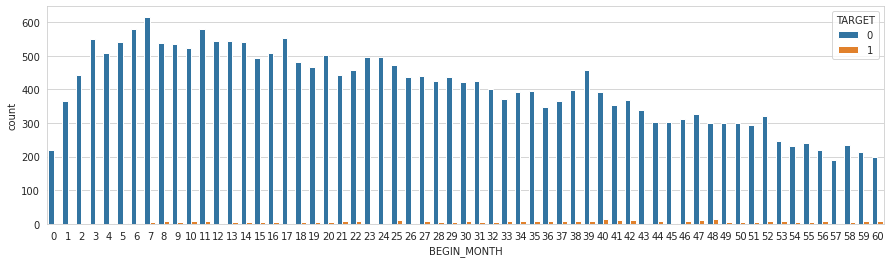

In [27]:
#checking the frequency of BEGIN_MONTH
plt.figure(figsize=(15,4))
sns.countplot(dataset["BEGIN_MONTH"])
plt.figure(figsize=(15,4))
sns.countplot(dataset["BEGIN_MONTH"],hue="TARGET",data=dataset)
plt.show()

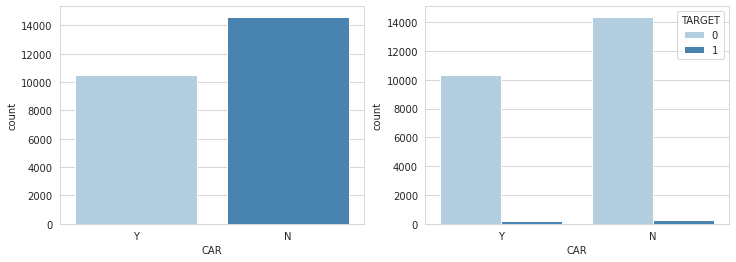

In [28]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.countplot(dataset["CAR"],palette="Blues")
plt.subplot(122)
sns.countplot(dataset.CAR,hue="TARGET",data=dataset,palette="Blues")
plt.show()

In [29]:
#these columns have continuous values other are having discrete entries
cont=dataset[["INCOME","BEGIN_MONTH","AGE","YEARS_EMPLOYED"]]

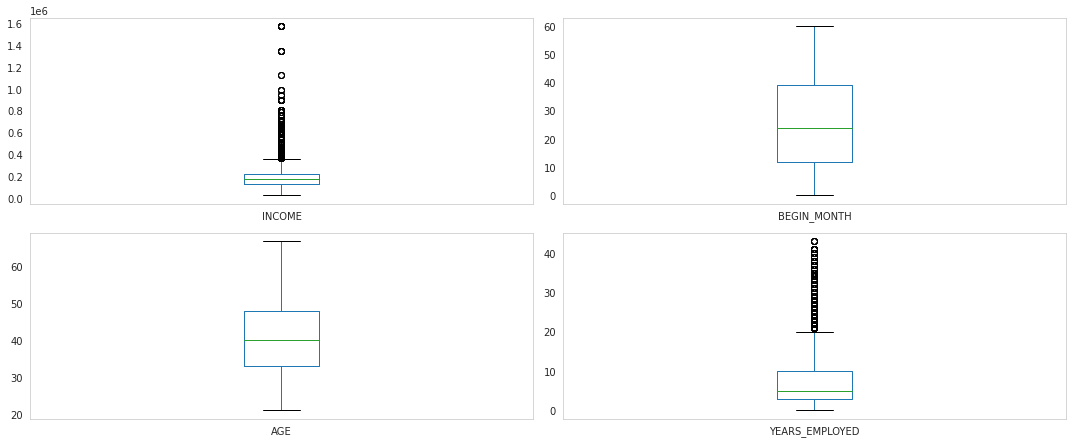

In [30]:
#Using Boxplot to detect the outliers-
plt.figure(figsize=(15,12))

for i ,col in enumerate(list(cont.columns)):
    plt.subplot(4,2,i+1)
    cont.boxplot(col)
    plt.grid()
    plt.tight_layout()

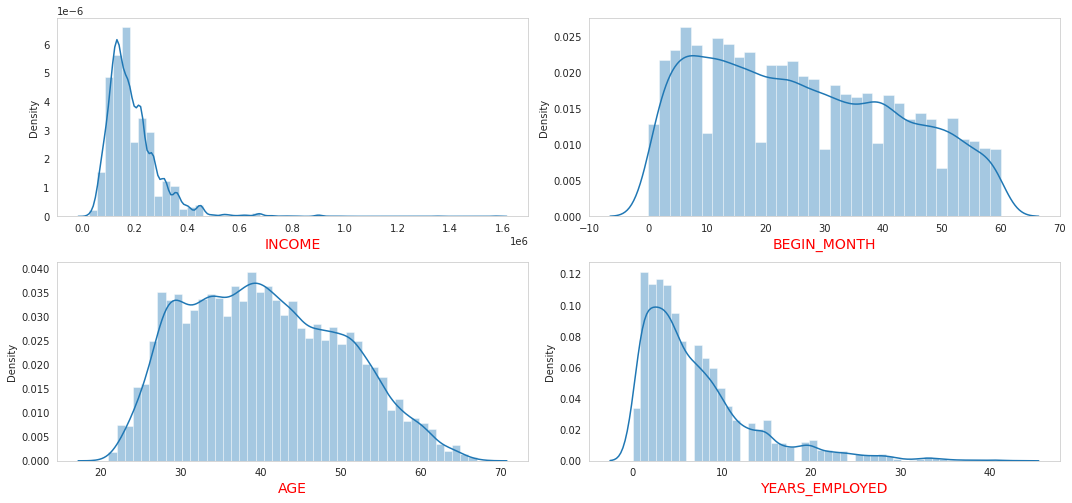

In [31]:
# Distribution of columns those have continuous -
#Histogram
plt.figure(figsize=(15,10))

for i ,cols in enumerate(list(cont.columns)):
    plt.subplot(3,2,i+1)
    sns.distplot(cont[cols])
    plt.xlabel(cols,fontsize=14,color="Red")
    plt.grid()
    plt.tight_layout()

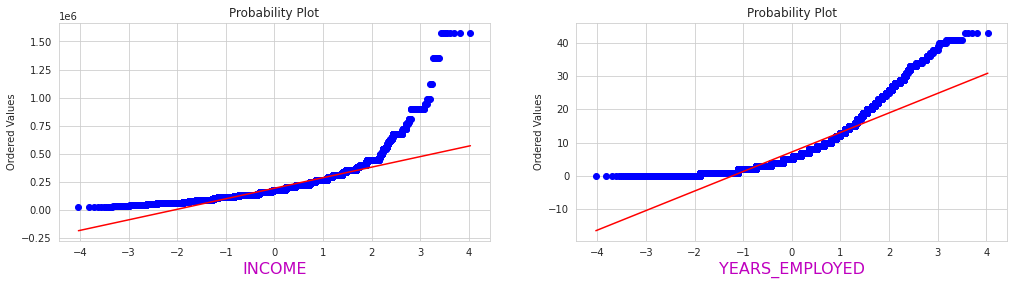

In [32]:
plt.figure(figsize=(17,4))

plt.subplot(121)
res=stats.probplot(dataset.INCOME,plot=plt,dist="norm")
plt.xlabel("INCOME",fontsize=16,color="m")

plt.subplot(122)
res=stats.probplot(dataset.YEARS_EMPLOYED,plot=plt,dist="norm")
plt.xlabel("YEARS_EMPLOYED",fontsize=16,color="m")

plt.show()

In [33]:
#removing values those are greater then 600000
dataset=dataset[dataset['INCOME'] < 600000]

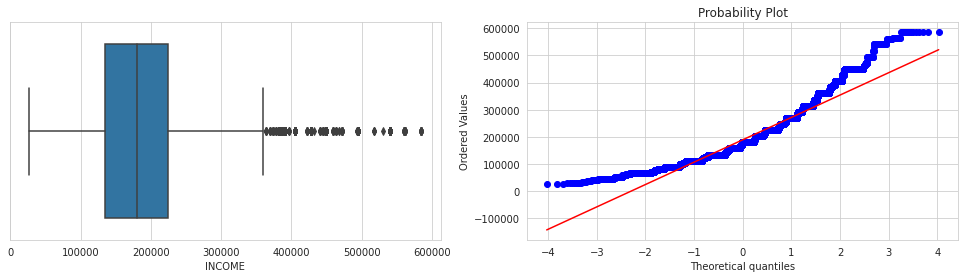

In [34]:
plt.figure(figsize=(17,4))

plt.subplot(121)
sns.boxplot(dataset.INCOME)

plt.subplot(122)
res=stats.probplot(dataset.INCOME,plot=plt,dist="norm")

In [35]:
#Dropping the values greater the 20
dataset=dataset[dataset['YEARS_EMPLOYED'] < 20]

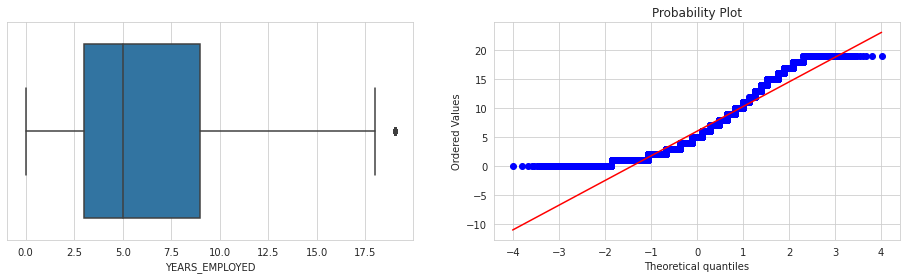

In [36]:
plt.figure(figsize=(16,4))
plt.subplot(121)
sns.boxplot(dataset.YEARS_EMPLOYED)
plt.subplot(122)
res=stats.probplot(dataset.YEARS_EMPLOYED,plot=plt,dist="norm")

In [37]:
dataset.drop(columns={"ID"},inplace=True,axis=1)

In [38]:
#everyone has phone 
dataset.drop("FLAG_MOBIL",inplace=True,axis=1)

In [39]:
#converting float data types to INT64 datatype
floats=["INCOME","FAMILY SIZE","BEGIN_MONTH"]

for i in floats:
    dataset[i]=dataset[i].astype("int64")

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
labels=["GENDER","CAR","REALITY","INCOME_TYPE","EDUCATION_TYPE","HOUSE_TYPE","FAMILY_TYPE"]
label=LabelEncoder()

for i in labels:
    dataset[i]=label.fit_transform(dataset[i])

In [42]:
#dataset after using LabelEncoder
dataset.head()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,1,1,1,0,112500,4,4,1,1,0,0,0,2,29,59,3,0
1,0,0,1,0,270000,0,4,3,1,0,1,1,1,4,52,8,0
2,0,0,1,0,270000,0,4,3,1,0,1,1,1,26,52,8,0
3,0,0,1,0,270000,0,4,3,1,0,1,1,1,26,52,8,0
4,0,0,1,0,270000,0,4,3,1,0,1,1,1,38,52,8,0


In [43]:
#corr of the 
dataset.corr()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
GENDER,1.000000,0.335480,-0.038093,0.007133,0.215555,0.054693,0.049496,-0.048857,0.050642,0.016151,-0.022394,-0.029970,0.033294,-0.004875,-0.088454,-0.074834,0.018699
CAR,0.335480,1.000000,0.010930,0.060831,0.213636,0.001591,-0.072167,-0.098587,0.005645,-0.024479,-0.025668,0.001649,0.104713,0.026117,-0.052365,-0.002096,-0.003231
REALITY,-0.038093,0.010930,1.000000,0.021140,0.030626,-0.029387,0.008892,0.001889,-0.176601,-0.207793,-0.060026,0.062439,0.021296,-0.011152,0.089129,-0.008422,-0.022924
NO_OF_CHILD,0.007133,0.060831,0.021140,1.000000,-0.034394,0.041044,-0.024205,-0.161934,0.004803,-0.000719,-0.013026,-0.016472,0.905458,0.006449,-0.238263,0.015776,-0.003085
INCOME,0.215555,0.213636,0.030626,-0.034394,1.000000,-0.151565,-0.201597,0.036170,-0.007361,-0.098489,0.006639,0.068385,-0.045235,0.031696,0.053488,0.044452,0.011164
INCOME_TYPE,0.054693,0.001591,-0.029387,0.041044,-0.151565,1.000000,0.105883,-0.012714,-0.008985,0.079314,0.002694,-0.042644,0.043303,-0.005473,0.001142,0.024137,-0.001414
EDUCATION_TYPE,0.049496,-0.072167,0.008892,-0.024205,-0.201597,0.105883,1.000000,-0.001881,-0.029707,0.007729,-0.054091,-0.105592,-0.019444,-0.013024,0.144156,0.020961,-0.010094
FAMILY_TYPE,-0.048857,-0.098587,0.001889,-0.161934,0.036170,-0.012714,-0.001881,1.000000,0.040743,-0.048622,-0.026204,-0.013375,-0.520295,-0.042932,0.011540,-0.033102,0.022860
HOUSE_TYPE,0.050642,0.005645,-0.176601,0.004803,-0.007361,-0.008985,-0.029707,0.040743,1.000000,0.002463,-0.024382,-0.007611,-0.018643,-0.028966,-0.181886,-0.056428,0.001291
WORK_PHONE,0.016151,-0.024479,-0.207793,-0.000719,-0.098489,0.079314,0.007729,-0.048622,0.002463,1.000000,0.364953,-0.064787,0.016321,0.013210,-0.045377,0.012513,0.007058


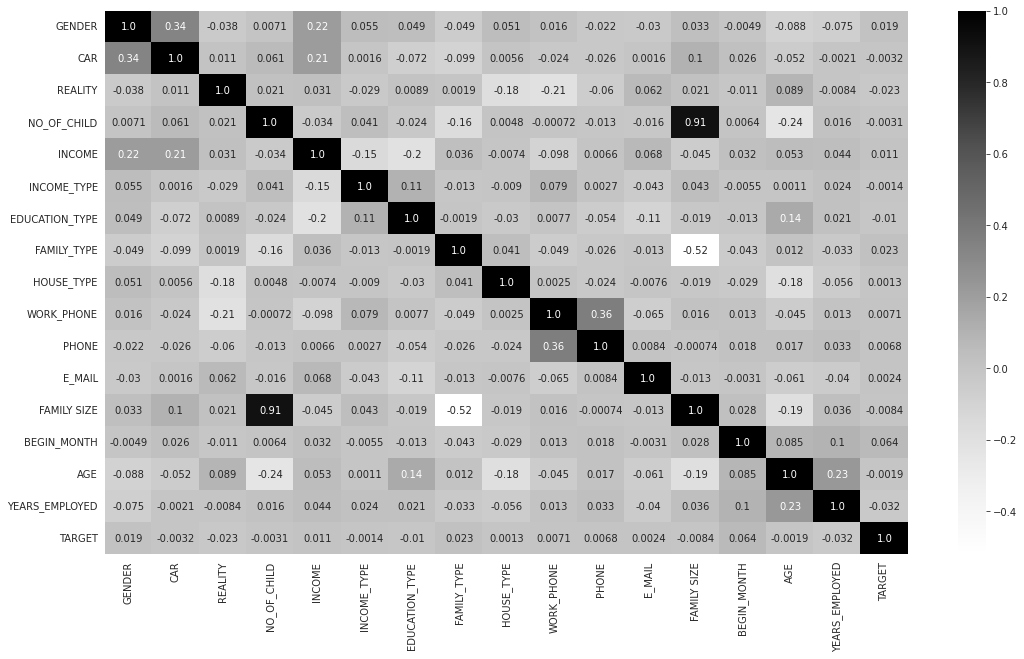

In [44]:
plt.figure(figsize=(18,10))
sns.heatmap(dataset.corr(),annot=True,fmt='.2',cmap="Greys")
plt.show()

In [45]:
#FAMILY_SIZE and NO_OF_CHILD are highly correlated to each other so we can drop one feature form the dataset
dataset.drop('NO_OF_CHILD',inplace=True,axis=1)

In [46]:
from sklearn.tree import ExtraTreeClassifier

In [47]:
X=dataset.drop("TARGET",axis=1)
y=dataset.TARGET

In [48]:
print("X :",X.shape)
print("y :",y.shape)

X : (23361, 15)
y : (23361,)


In [49]:
model=ExtraTreeClassifier()
model.fit(X,y)

ExtraTreeClassifier()

In [50]:
print(model.feature_importances_)

[2.84252817e-02 6.49817655e-03 1.17638332e-02 1.38925763e-01
 3.41197949e-02 2.85034259e-02 5.85998732e-02 3.95505991e-02
 6.50490261e-03 4.91960848e-05 1.19998795e-02 5.02577026e-02
 3.44465520e-01 1.17480759e-01 1.22855293e-01]


In [51]:
feat=pd.Series(model.feature_importances_,index=X.columns)

In [52]:
feats=feat.to_frame().reset_index()
feats.columns=["Features","Scores"]
features=feats.sort_values(by="Scores",ascending=False)
top_features=features.nlargest(12,"Scores")
top_features

,Features,Scores
12,BEGIN_MONTH,0.344466
3,INCOME,0.138926
14,YEARS_EMPLOYED,0.122855
13,AGE,0.117481
6,FAMILY_TYPE,0.058600
11,FAMILY SIZE,0.050258
7,HOUSE_TYPE,0.039551
4,INCOME_TYPE,0.034120
5,EDUCATION_TYPE,0.028503
0,GENDER,0.028425


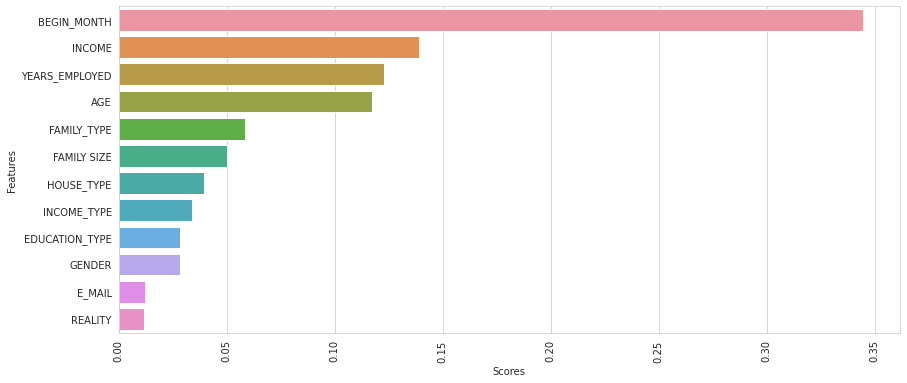

In [53]:
plt.figure(figsize=(14,6))
sns.barplot(y="Features",x="Scores",data=top_features)
plt.xticks(rotation=90)
plt.show()

In [54]:
new_data=dataset[["GENDER","BEGIN_MONTH","AGE","INCOME","YEARS_EMPLOYED","FAMILY SIZE","INCOME_TYPE","FAMILY_TYPE","WORK_PHONE"
                  ,"PHONE","HOUSE_TYPE","EDUCATION_TYPE","TARGET"]]

In [55]:
new_data.shape

(23361, 13)

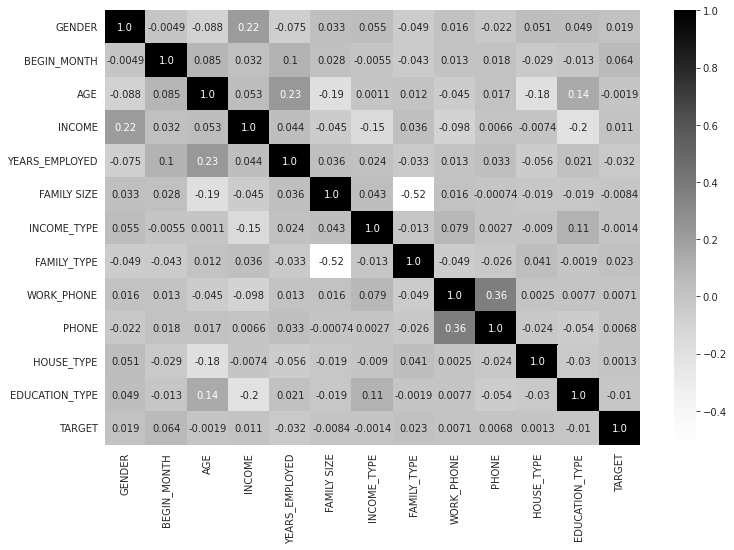

In [56]:
plt.figure(figsize=(12,8))
sns.heatmap(new_data.corr(),fmt='.2',annot=True,cmap="Greys")
plt.show()

In [57]:
new_data.head()

,GENDER,BEGIN_MONTH,AGE,INCOME,YEARS_EMPLOYED,FAMILY SIZE,INCOME_TYPE,FAMILY_TYPE,WORK_PHONE,PHONE,HOUSE_TYPE,EDUCATION_TYPE,TARGET
0,1,29,59,112500,3,2,4,1,0,0,1,4,0
1,0,4,52,270000,8,1,0,3,0,1,1,4,0
2,0,26,52,270000,8,1,0,3,0,1,1,4,0
3,0,26,52,270000,8,1,0,3,0,1,1,4,0
4,0,38,52,270000,8,1,0,3,0,1,1,4,0


In [58]:
dummy_data=pd.get_dummies(new_data,columns={"GENDER","FAMILY SIZE","INCOME_TYPE","FAMILY_TYPE","WORK_PHONE","PHONE",
                                            "HOUSE_TYPE","EDUCATION_TYPE"},drop_first=True)

In [59]:
#shape of the dataset after creating dummy variables
dummy_data.shape

(23361, 34)

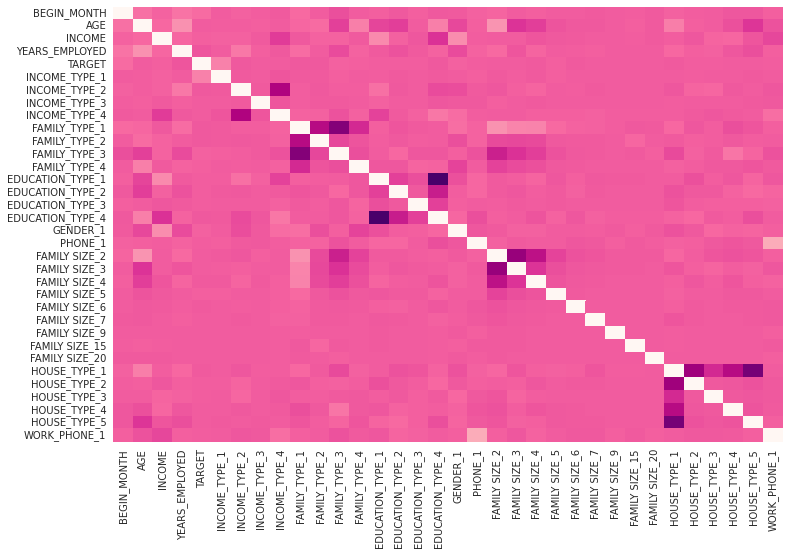

In [60]:
#checking the correlation of the new dataset
plt.figure(figsize=(12,8))
sns.heatmap(dummy_data.corr(),fmt='.2',cbar=False,cmap="RdPu_r")
plt.show()

In [61]:
data=dummy_data.copy()

In [62]:
data_minority=data[dataset["TARGET"] == 1]
data_majority=data[dataset["TARGET"] == 0]

In [63]:
print("Data_majority :",data_majority.shape)
print("Data_minority :",data_minority.shape)

Data_majority : (22957, 34)
Data_minority : (404, 34)


In [64]:
#library for perfroming SMOTE
from imblearn.over_sampling import SMOTE

In [65]:
data_oversampled=data.copy()

In [66]:
data_oversampled.TARGET.value_counts()

0    22957
1      404
Name: TARGET, dtype: int64

In [67]:
#setting TARGET variable SMOTE
X=data_oversampled.drop("TARGET",axis=1)
y=data_oversampled.TARGET

In [72]:
X_smote,y_smote=SMOTE().fit_resample(X,y)

In [73]:
#shape of dataset after using SMOTE
print("X",X_smote.shape)
print("y",y_smote.shape)

X (45914, 33)
y (45914,)


In [74]:
#head of data after using SMOTE
X_smote.head()

,BEGIN_MONTH,AGE,INCOME,YEARS_EMPLOYED,INCOME_TYPE_1,INCOME_TYPE_2,INCOME_TYPE_3,INCOME_TYPE_4,FAMILY_TYPE_1,FAMILY_TYPE_2,...,FAMILY SIZE_7,FAMILY SIZE_9,FAMILY SIZE_15,FAMILY SIZE_20,HOUSE_TYPE_1,HOUSE_TYPE_2,HOUSE_TYPE_3,HOUSE_TYPE_4,HOUSE_TYPE_5,WORK_PHONE_1
0,29,59,112500,3,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
1,4,52,270000,8,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,26,52,270000,8,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,26,52,270000,8,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,38,52,270000,8,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


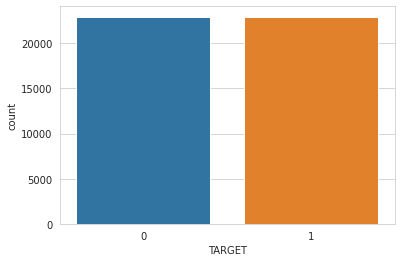

In [75]:
sns.countplot(y_smote)
plt.show()

In [76]:
#considering the continuous variables -
X_smote_continuous=X_smote[["BEGIN_MONTH","AGE","INCOME","YEARS_EMPLOYED"]]

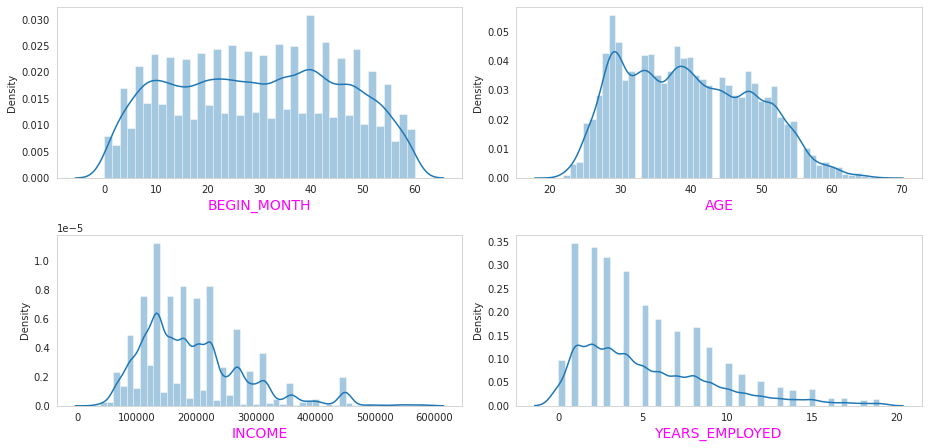

In [77]:
#distribution of the continuous variables after sampling the data using SMOTE -
plt.figure(figsize=(13,9))

for i,col in enumerate((X_smote_continuous.columns)):
    plt.subplot(3,2,i+1)
    sns.distplot(X_smote_continuous[col])
    plt.xlabel(col,fontsize=14,color="Magenta")
    plt.grid()
    plt.tight_layout()

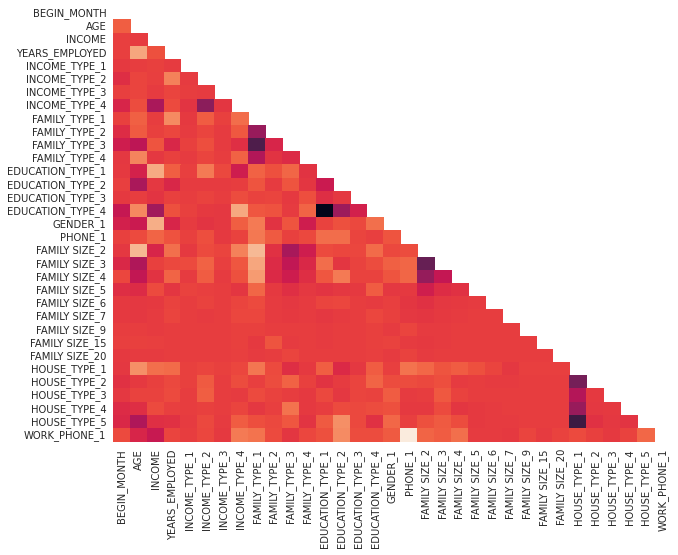

In [78]:
plt.figure(figsize=(10,8))
matrix = np.triu(X_smote.corr())
sns.heatmap(X_smote.corr(),mask=matrix,cbar=False)
plt.show()

In [79]:
X_train_over,X_test_over,y_train_over,y_test_over=train_test_split(X_smote,y_smote,test_size=0.25,random_state=99)

In [80]:
#size of data after spliting
print("X_train_over : ",X_train_over.shape,"\ny_train_over : ",y_train_over.shape)
print("X_train_over : ",X_test_over.shape,"\ny_train_over : ",y_test_over.shape)

X_train_over :  (34435, 33) 
y_train_over :  (34435,)
X_train_over :  (11479, 33) 
y_train_over :  (11479,)


In [85]:
#Random Forest Classification
random_over=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=25, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=50, min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False)

In [86]:
random_over.fit(X_train_over,y_train_over)

RandomForestClassifier(max_depth=25, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=50, n_estimators=700)

In [87]:
pred_over=random_over.predict(X_test_over)

In [88]:
print(metrics.classification_report(pred_over,y_test_over))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      5856
           1       0.96      0.99      0.98      5623

    accuracy                           0.98     11479
   macro avg       0.98      0.98      0.98     11479
weighted avg       0.98      0.98      0.98     11479



In [89]:
print(metrics.precision_score(pred_over,y_test_over))

0.9641496363006581


In [90]:
score_over = {}
score_over["Random_Forest"] ={}
score_over["Random_Forest"]["Precision"]=metrics.precision_score(pred_over,y_test_over)*100
score_over["Random_Forest"]["Recall"]=metrics.recall_score(pred_over,y_test_over)*100
score_over["Random_Forest"]["Accuracy"]=metrics.accuracy_score(pred_over,y_test_over)*100

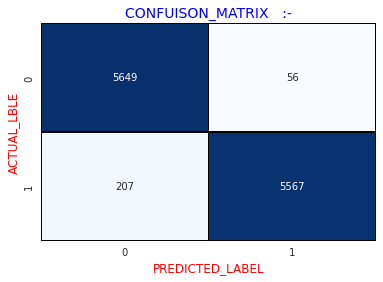

In [91]:
sns.heatmap(metrics.confusion_matrix(y_test_over,pred_over),annot=True,cbar=False
            ,cmap="Blues",fmt="1",linecolor="Black",linewidth=0.3)
plt.xlabel("PREDICTED_LABEL",fontsize=12,color='r')
plt.ylabel("ACTUAL_LBLE",fontsize=12,color='r')
plt.title("CONFUISON_MATRIX   :-",fontsize=14,color="b")
plt.show()

In [94]:
#Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier

In [95]:
tree=DecisionTreeClassifier()
tree.fit(X_train_over,y_train_over)

DecisionTreeClassifier()

In [96]:
pred_tree=tree.predict(X_test_over)

In [97]:
print(metrics.classification_report(y_test_over,pred_tree))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      5705
           1       0.98      0.99      0.98      5774

    accuracy                           0.98     11479
   macro avg       0.98      0.98      0.98     11479
weighted avg       0.98      0.98      0.98     11479



In [98]:
score_over["Decision_Tree"] ={}
score_over["Decision_Tree"]["Precision"]=metrics.precision_score(pred_tree,y_test_over)*100
score_over["Decision_Tree"]["Recall"]=metrics.recall_score(pred_tree,y_test_over)*100
score_over["Decision_Tree"]["Accuracy"]=metrics.accuracy_score(pred_tree,y_test_over)*100

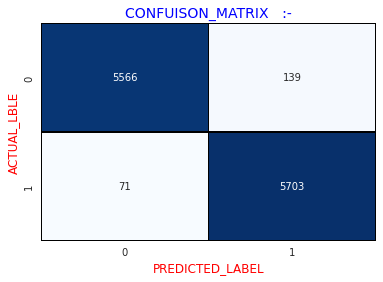

In [99]:
sns.heatmap(metrics.confusion_matrix(y_test_over,pred_tree),annot=True,cbar=False
            ,cmap="Blues",fmt="1",linecolor="Black",linewidth=0.3)
plt.xlabel("PREDICTED_LABEL",fontsize=12,color='r')
plt.ylabel("ACTUAL_LBLE",fontsize=12,color='r')
plt.title("CONFUISON_MATRIX   :-",fontsize=14,color="b")
plt.show()

In [100]:
score_oversampling=pd.DataFrame(score_over)

In [101]:
#library for selecting data at random
from sklearn.utils import resample

In [102]:
data_undersampled=data.copy()

In [103]:
#target class count bofer under_sampling
data_undersampled.TARGET.value_counts()


0    22957
1      404
Name: TARGET, dtype: int64

In [104]:
#splitting the whole data set into to parts for under_sampling method-
data_majority_undersampled=data_undersampled[data_undersampled["TARGET"] == 0]
data_minority_undersampled=data_undersampled[data_undersampled["TARGET"] == 1]

In [105]:
#here we will be keeing the majority class double the size of minority class to prevent the model from underfitting
data_under_sampled=resample(data_majority_undersampled,n_samples=844,replace=True,random_state=42)

In [106]:
#shape of the majority class after resampling :
print(data_under_sampled.shape)

(844, 34)


In [107]:
data_under=pd.concat([data_under_sampled,data_minority])

In [109]:
#data after under sample
data_under.head()

,BEGIN_MONTH,AGE,INCOME,YEARS_EMPLOYED,TARGET,INCOME_TYPE_1,INCOME_TYPE_2,INCOME_TYPE_3,INCOME_TYPE_4,FAMILY_TYPE_1,...,FAMILY SIZE_7,FAMILY SIZE_9,FAMILY SIZE_15,FAMILY SIZE_20,HOUSE_TYPE_1,HOUSE_TYPE_2,HOUSE_TYPE_3,HOUSE_TYPE_4,HOUSE_TYPE_5,WORK_PHONE_1
17148,47,48,90000,1,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
946,34,51,450000,7,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
5859,10,41,225000,8,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
23404,52,48,225000,7,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13051,4,53,90000,4,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [110]:
#size of new data_ after under_sampling
data_under.shape

(1248, 34)

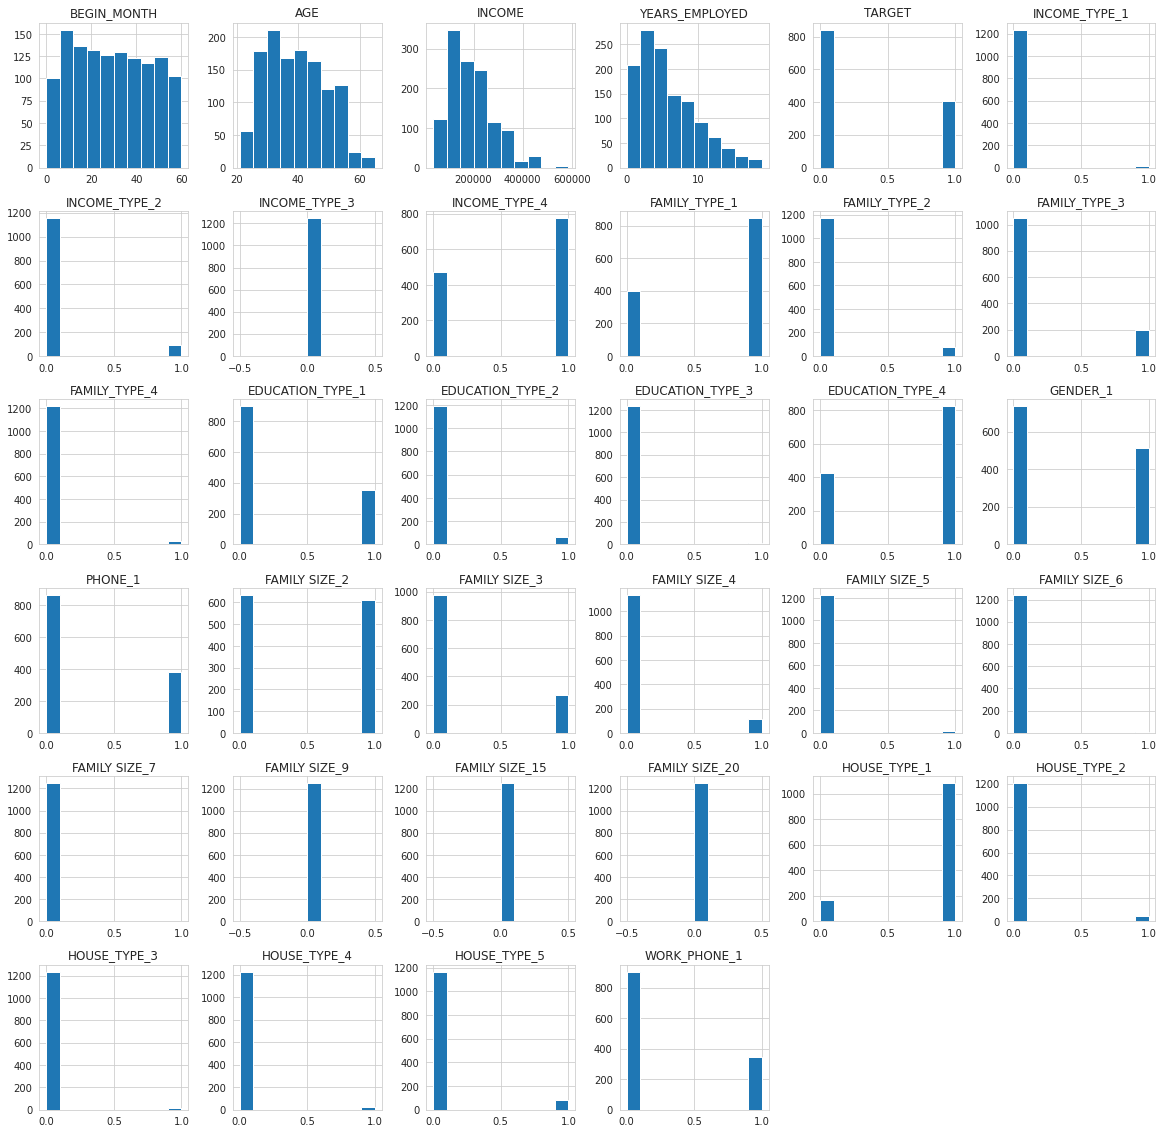

In [111]:
#data distribution after under sampling
data_under.hist(figsize=(20,20))
plt.show()

In [112]:
#target column of sampled data
print(data_under.TARGET.value_counts())

0    844
1    404
Name: TARGET, dtype: int64


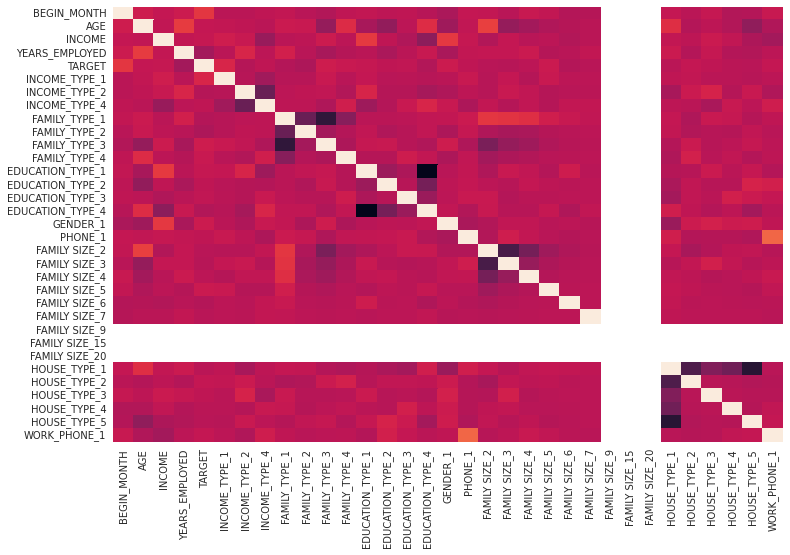

In [113]:
#Corr plot of the under_sampled data look same the normal data Major difference is not seen here in the plot.
#Removing from the correlation plot INCOME_TYPE_3 because it has all the values 1
plt.figure(figsize=(12,8))
sns.heatmap(data_under.drop("INCOME_TYPE_3",axis=1).corr(),fmt='.2',cbar=False)
plt.show()

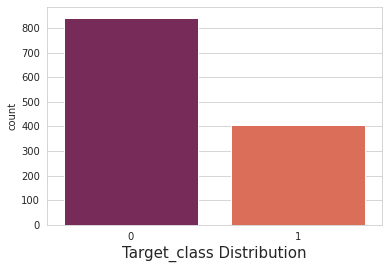

In [114]:
#after under_sampling the data now target class have 1:2 distribution
sns.countplot(data_under.TARGET,palette="rocket")
plt.xlabel("Target_class Distribution",fontsize=15)
plt.show()

In [115]:
X_under=data_under.drop("TARGET",axis=1)
y_under=data_under.TARGET

In [116]:
#spliting the data for train and test:
X_train_under,X_test_under,y_train_under,y_test_under=train_test_split(X_under,y_under,test_size=0.25,random_state=71)

In [117]:
#size of data after spliting
print("X_train_under : ",X_train_under.shape,"\ny_train_under : ",y_train_under.shape)
print("X_train_under : ",X_test_under.shape,"\ny_train_under : ",y_test_under.shape)

X_train_under :  (936, 33) 
y_train_under :  (936,)
X_train_under :  (312, 33) 
y_train_under :  (312,)


In [119]:
random_under=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=2, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [120]:
random_under.fit(X_train_under,y_train_under)

RandomForestClassifier(max_depth=25, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=50, n_estimators=700)

In [121]:
pred_under=random_under.predict(X_test_under)
print(metrics.classification_report(pred_under,y_test_under))

              precision    recall  f1-score   support

           0       0.99      0.67      0.80       303
           1       0.06      0.78      0.12         9

    accuracy                           0.67       312
   macro avg       0.53      0.72      0.46       312
weighted avg       0.96      0.67      0.78       312



In [122]:
precision_under=(metrics.precision_score(pred_under,y_test_under))
precision_under

0.06481481481481481

In [123]:
score_under = {}
score_under["Random_Forest"] ={}
score_under["Random_Forest"]["Precision"]=metrics.precision_score(pred_under,y_test_under)*100
score_under["Random_Forest"]["Recall"]=metrics.recall_score(pred_under,y_test_under)*100
score_under["Random_Forest"]["Accuracy"]=metrics.accuracy_score(pred_under,y_test_under)*100

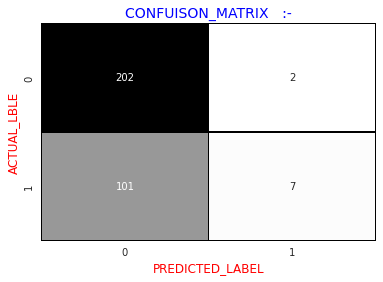

In [124]:
sns.heatmap(metrics.confusion_matrix(y_test_under,pred_under),annot=True,cbar=False
            ,cmap="Greys",fmt="1",linecolor="Black",linewidth=0.3)
plt.xlabel("PREDICTED_LABEL",fontsize=12,color='r')
plt.ylabel("ACTUAL_LBLE",fontsize=12,color='r')
plt.title("CONFUISON_MATRIX   :-",fontsize=14,color="b")
plt.show()

In [125]:
tree_under=DecisionTreeClassifier()
tree_under.fit(X_train_under,y_train_under)

DecisionTreeClassifier()

In [126]:
pred_under_tree=tree_under.predict(X_test_under)

In [127]:
print(metrics.classification_report(pred_under_tree,y_test_under))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       225
           1       0.41      0.51      0.45        87

    accuracy                           0.66       312
   macro avg       0.60      0.61      0.60       312
weighted avg       0.68      0.66      0.67       312



In [128]:
score_under["Decision_Tree"] ={}
score_under["Decision_Tree"]["Precision"]=metrics.precision_score(pred_under_tree,y_test_under)*100
score_under["Decision_Tree"]["Recall"]=metrics.recall_score(pred_under_tree,y_test_under)*100
score_under["Decision_Tree"]["Accuracy"]=metrics.accuracy_score(pred_under_tree,y_test_under)*100

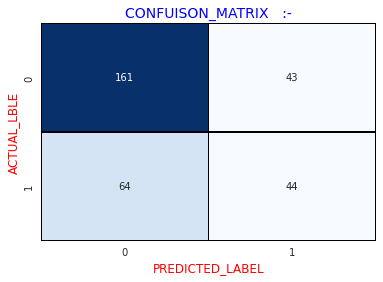

In [129]:
sns.heatmap(metrics.confusion_matrix(y_test_under,pred_under_tree),annot=True,cbar=False
            ,cmap="Blues",fmt="1",linecolor="Black",linewidth=0.3)
plt.xlabel("PREDICTED_LABEL",fontsize=12,color='r')
plt.ylabel("ACTUAL_LBLE",fontsize=12,color='r')
plt.title("CONFUISON_MATRIX   :-",fontsize=14,color="b")
plt.show()

In [130]:
score_undersampling=pd.DataFrame(score_under)

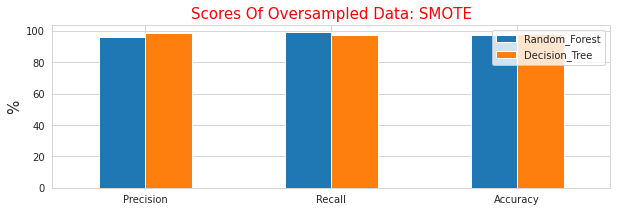

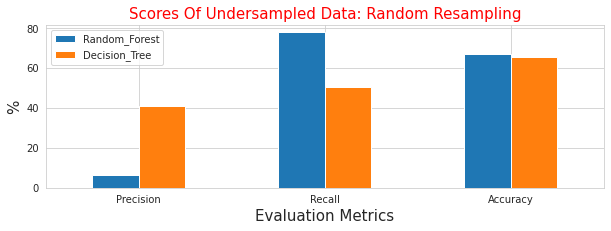

In [131]:
#Comparing Scores of Oversampled Data and Undersampled Data
score_oversampling.plot(kind="bar",figsize=(10,3))
plt.xticks(rotation=(0))
#plt.xlabel("Evaluation Metrics",fontsize=15)
plt.ylabel("%",fontsize=15)
plt.title("Scores Of Oversampled Data: SMOTE",fontsize=15,color="Red")

score_undersampling.plot(kind="bar",figsize=(10,3))
plt.xticks(rotation=(0))
plt.xlabel("Evaluation Metrics",fontsize=15)
plt.ylabel("%",fontsize=15)
plt.title("Scores Of Undersampled Data: Random Resampling",fontsize=15,color="Red")
plt.show()

Xtest : 0.9968152742491272 


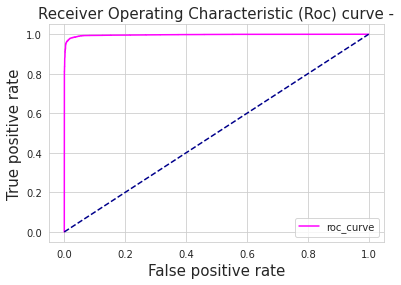

In [132]:
#Receiver Operating Characteristic (Roc) curve
from sklearn.metrics import roc_auc_score,roc_curve

ytest_pred=random_over.predict_proba(X_test_over)
print("Xtest : {} ".format(roc_auc_score(y_test_over,ytest_pred[:,-1])))
ytest_pred_ = ytest_pred[:,-1]

fpr,tpr,thresholds = roc_curve(y_test_over,ytest_pred_)

#plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label='roc_curve',color='MAGENTA')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel("True positive rate",fontsize=15)
plt.xlabel("False positive rate",fontsize=15)
plt.title("Receiver Operating Characteristic (Roc) curve -",fontsize=15)
plt.legend()
plt.show()

In [134]:
#Our conclusion is that by implementing SMOTE on our dataset, it helps us with the imbalance of our labels that is more no fraud than fraud transactions.
#In Ramdom Undersampling where the data is reduced to size of the minority class, most of the important data from the dataset is lost.